In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None, base_link="base_link")
# s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

connection_list
[False]


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


added robot collision boundaries
0 / 100 (0 / 33388 s): current success ratio = 0.0
connection_list
[False]
added robot collision boundaries


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


0 / 5000 (0 / 131369 s): current success ratio = 1.0
100 / 5000 (23 / 1164 s): current success ratio = 0.326732673267
200 / 5000 (48 / 1201 s): current success ratio = 0.298507462687
300 / 5000 (73 / 1225 s): current success ratio = 0.282392026578
400 / 5000 (99 / 1245 s): current success ratio = 0.269326683292
500 / 5000 (125 / 1254 s): current success ratio = 0.263473053892
600 / 5000 (150 / 1252 s): current success ratio = 0.26455906822
700 / 5000 (177 / 1269 s): current success ratio = 0.25392296719
800 / 5000 (202 / 1266 s): current success ratio = 0.255930087391
900 / 5000 (229 / 1272 s): current success ratio = 0.251942286349
1000 / 5000 (253 / 1267 s): current success ratio = 0.254745254745
1100 / 5000 (277 / 1259 s): current success ratio = 0.259763851045
1200 / 5000 (303 / 1266 s): current success ratio = 0.255620316403
1300 / 5000 (329 / 1268 s): current success ratio = 0.254419677171
1400 / 5000 (354 / 1267 s): current success ratio = 0.254817987152
1500 / 5000 (379 / 1265 

/home/rnb/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


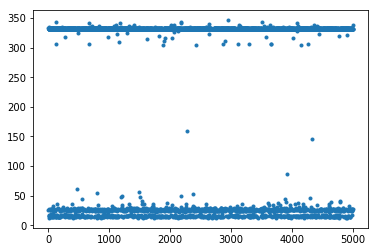

In [5]:
rtrain.collect_and_learn(RobotType.indy7, "indy0_tcp", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=0.3)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

connection_list
[False]
added robot collision boundaries
0 / 100 (0 / 53359 s): current success ratio = 0.0
connection_list
[False]
added robot collision boundaries
0 / 5000 (0 / 605084 s): current success ratio = 1.0
100 / 5000 (41 / 2090 s): current success ratio = 0.287128712871
200 / 5000 (85 / 2138 s): current success ratio = 0.253731343284
300 / 5000 (129 / 2166 s): current success ratio = 0.235880398671
400 / 5000 (176 / 2207 s): current success ratio = 0.214463840399
500 / 5000 (223 / 2232 s): current success ratio = 0.201596806387
600 / 5000 (270 / 2251 s): current success ratio = 0.191347753744
700 / 5000 (317 / 2269 s): current success ratio = 0.184022824536
800 / 5000 (364 / 2278 s): current success ratio = 0.179775280899
900 / 5000 (413 / 2299 s): current success ratio = 0.169811320755
1000 / 5000 (459 / 2296 s): current success ratio = 0.171828171828
1100 / 5000 (506 / 2303 s): current success ratio = 0.1689373297
1200 / 5000 (553 / 2305 s): current success ratio = 0.1673

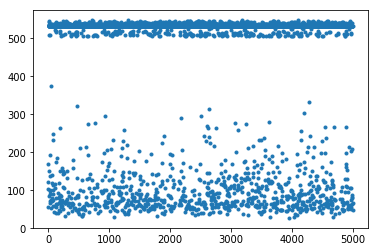

In [6]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=1)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [5]:
rtrain.load_and_learn(RobotType.indy7)
rtrain.load_and_learn(RobotType.panda)

/home/rnb/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


trainset: 	333.0 ms/1 = 332.803 ms (332.803/332.803)
testset: 	85.0 ms/1 = 84.98 ms (84.98/84.98)

trainning accuracy = 99.44 %
test accuracy = 98.44 %
trainning success accuracy = 99.38 %
trainning failure accuracy = 99.46 %
test success accuracy = 98.02 %
test failure accuracy = 98.59 %
trainset: 	437.0 ms/1 = 436.884 ms (436.884/436.884)
testset: 	102.0 ms/1 = 102.171 ms (102.171/102.171)

trainning accuracy = 98.9 %
test accuracy = 98.16 %
trainning success accuracy = 97.94 %
trainning failure accuracy = 99.11 %
test success accuracy = 95.29 %
test failure accuracy = 98.77 %


## load and test

In [5]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	340.0 ms/1 = 340.071 ms (340.071/340.071)
testset: 	84.0 ms/1 = 83.748 ms (83.748/83.748)

trainning accuracy = 99.44 %
test accuracy = 98.44 %
trainning success accuracy = 99.38 %
trainning failure accuracy = 99.46 %
test success accuracy = 98.02 %
test failure accuracy = 98.59 %
trainset: 	410.0 ms/1 = 409.869 ms (409.869/409.869)
testset: 	105.0 ms/1 = 104.966 ms (104.966/104.966)

trainning accuracy = 98.9 %
test accuracy = 98.16 %
trainning success accuracy = 97.94 %
trainning failure accuracy = 99.11 %
test success accuracy = 95.29 %
test failure accuracy = 98.77 %
